# Normalised Mutual Information Calculation

- FROM: https://www.nature.com/articles/s41586-021-04206-7
- ALSO in:
    - https://doi.org/10.1016/j.ccell.2020.06.012

For the calculation of entropy and mutual information the Julia package InformationMeasures.jl was used.


First, for each cell X, gene expression was discretized into 10 bins.

Then, entropy (H) was calculated for each cell vector X where H is the entropy for cell X and p(xi) is the probability of cell X in bin i. 
```julia
get_entropy(cell_expression_vector; base = 2, number_of_bins = 10)
``` 
$$
H(X)=-\mathop{\sum }\limits_{i=1}^{n}p({x}_{i})\log p({x}_{i})
$$

Mutual information (MI) was then calculated for each cell pair where I is the mutual information for cell pair X;Y, p(x,y) is the joint probability of cell pair X and Y across all the bins, and p(x) and p(y) are the marginal probability of cell X and cell Y across all the bins, respectively.

```julia
get_mutual_information(cell_expression_vector1, cell_expression_vector2, base = 2, number_of_bins = 10)
```
$$
I(X;Y)=\sum _{y}\sum _{x}p(x,y)\log \,\frac{p(x,y)}{p(x)p(y)}
$$

Finally, Normalised Mutual Information (NMI) was calculated as pairwise MI divided by the entropy:

```julia
nmi = mi[x, y] / sqrt(h[x]*h[y])
```

$$
{\rm{NMI}}(X,Y)=\frac{I(X;Y)}{\sqrt{H(X)H(Y)}}
$$

To get robust results, we resampled 100 cells 100 times without replacement and summarized in box plots.

Where r is the number of comparisons in which the heterogeneity metrics in one group is at least as extreme as the one in another group and n is the total number of comparisons. Empirical p-value was calculated as

```julia
wt = subtb[subtb[!,:Genotype].=="WT", :NMI]
rad = subtb[subtb[!,:Genotype].=="RAD21", :NMI]
p = (sum(wt .< rad)+1)/((nrow(subtb)/2)+1)
```
$$
P=\frac{r+1}{n+1}
$$



p-value was also calculated using a two-sided Mann-Whitney U-test. 

In [1]:
ENV["Code"] = "../../Code"
for folder in readdir(ENV["Code"]); push!(LOAD_PATH, normpath(ENV["Code"], folder));end

using Seaborn, PyPlot, PyCall, DataFrames
using NoLongerProblems_Pandas, Pandas
using MultipleTesting, HypothesisTests 
using SingleCellExperiment, StatsBase
using ProgressMeter, Random
using InformationMeasures
using CSV, ProgressMeter,PrettyPlotting, ScikitLearn
@sk_import linear_model: LogisticRegression

include("../Databases/Cuartero2018.jl")
include("../Databases/Bhatt2012.jl")
include("../Databases/MF_SingleCell.jl")
include("NMIFunctions.jl")

NMI_figure (generic function with 1 method)

0.009900990099009901
0.009900990099009901
0.009900990099009901


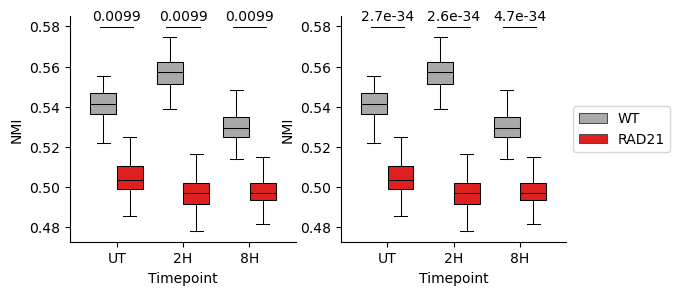

2.720638245404533e-34
2.561710724284355e-34
4.667211042196296e-34


In [2]:
include("../Code/Load_scRNAseqData.jl")
sce = SingleCellExperiment.get_cells_with_this_characteristics(["WT", "RAD21"], :Genotype, sce)
sce = SingleCellExperiment.select_expressed_genes(sce; min_cells_expressing_gene = 100)
sce = SingleCellExperiment.fit_mu_std_alpha(sce, splitdataby = :Sample, assay = "CPM")
tb = NMI_table(sce)
subplot(1,2,1)
NMI_figure(tb, pvalue_ = :option1)
legend_removal()
subplot(1,2,2)
NMI_figure(tb, pvalue_ = :option2)
legend_out_of_plot()
savefigwithtext("SingleCell_NMI.svg")
savefigwithtext("SingleCell_NMI.png")

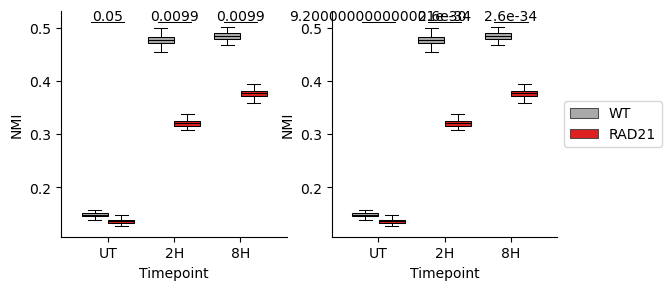

0.04950495049504951
0.009900990099009901
0.009900990099009901
9.191969109740935e-30
2.5621436691633854e-34
2.561999346290046e-34


In [3]:
include("../Code/Load_scRNAseqData.jl")
sce = SingleCellExperiment.get_cells_with_this_characteristics(["WT", "RAD21"], :Genotype, sce)
sce = SingleCellExperiment.fit_mu_std_alpha(sce, splitdataby = :Sample, assay = "CPM")
bhattgenes = Bhatt2012.inducible_genes_figure3()[!,:GeneSymbol];
sce = SingleCellExperiment.select_these_genes(bhattgenes, sce)
tb = NMI_table(sce)
subplot(1,2,1)
NMI_figure(tb, pvalue_ = :option1, u = 0.01)
legend_removal()
subplot(1,2,2)
NMI_figure(tb, pvalue_ = :option2, u = 0.01)
legend_out_of_plot()
savefigwithtext("SingleCell_NMIBhatt.svg")
savefigwithtext("SingleCell_NMIBhatt.png")

In [4]:
import Pkg
Pkg.status()

      Status `~/.julia/environments/v1.6/Project.toml`
  [7e6ae17a] BioSequences v2.0.5
  [336ed68f] CSV v0.9.11
  [8f4d0f93] Conda v1.5.2
  [a93c6f00] DataFrames v1.2.2
  [31c24e10] Distributions v0.25.28
  [c2308a5c] FASTX v1.2.0
  [09f84164] HypothesisTests v0.10.6
  [7073ff75] IJulia v1.23.2
  [916415d5] Images v0.24.1
  [96684042] InformationMeasures v0.3.1
  [f8716d33] MultipleTesting v0.5.0
  [92933f4c] ProgressMeter v1.7.1
  [438e738f] PyCall v1.92.5
  [d330b81b] PyPlot v2.10.0
  [6f49c342] RCall v0.13.12
  [d2ef9438] Seaborn v1.0.0
  [2913bbd2] StatsBase v0.33.13
